Convolutional Neural Networks are very similar to ordinary Neural Networks from the previous chapter: they are made up of neurons that have learnable weights and biases. Each neuron receives some inputs, performs a dot product and optionally follows it with a non-linearity. The whole network still expresses a single differentiable score function: from the raw image pixels on one end to class scores at the other. And they still have a loss function (e.g. SVM/Softmax) on the last (fully-connected) layer and all the tips/tricks we developed for learning regular Neural Networks still apply.

<h1>Why Convolutions</h1>
<ul>
<li><strong>Parameter sharing</strong>: a feature detector (such as a vertical edge detector) that&#8217;s useful in one part of the image is probably useful in another part of the image.</li>
<li><strong>Sparsity of connections</strong>: in each layer, each output value depends only on small number of inputs.</li>
</ul>
<p>~</p>
<h1>Convolution Operation</h1>
<h2>Basic Convolution Operation</h2>
<p><strong>Step 1</strong>: overlay the filter to the input, perform element wise multiplication, and add the result.</p>
<p style="text-align:center;"><img data-attachment-id="6508" data-permalink="https://indoml.com/2018/03/07/student-notes-convolutional-neural-networks-cnn-introduction/convolution-operation-1/" data-orig-file="https://indoml.files.wordpress.com/2018/03/convolution-operation-14.png" data-orig-size="731,307" data-comments-opened="1" data-image-meta="{&quot;aperture&quot;:&quot;0&quot;,&quot;credit&quot;:&quot;&quot;,&quot;camera&quot;:&quot;&quot;,&quot;caption&quot;:&quot;&quot;,&quot;created_timestamp&quot;:&quot;0&quot;,&quot;copyright&quot;:&quot;&quot;,&quot;focal_length&quot;:&quot;0&quot;,&quot;iso&quot;:&quot;0&quot;,&quot;shutter_speed&quot;:&quot;0&quot;,&quot;title&quot;:&quot;&quot;,&quot;orientation&quot;:&quot;0&quot;}" data-image-title="Convolution Operation 1" data-image-description="" data-medium-file="https://indoml.files.wordpress.com/2018/03/convolution-operation-14.png?w=300" data-large-file="https://indoml.files.wordpress.com/2018/03/convolution-operation-14.png?w=731" class="alignnone size-full wp-image-6508" src="https://indoml.files.wordpress.com/2018/03/convolution-operation-14.png?w=736" alt="Convolution Operation 1" srcset="https://indoml.files.wordpress.com/2018/03/convolution-operation-14.png 731w, https://indoml.files.wordpress.com/2018/03/convolution-operation-14.png?w=150 150w, https://indoml.files.wordpress.com/2018/03/convolution-operation-14.png?w=300 300w" sizes="(max-width: 731px) 100vw, 731px"   /></p>
<p><strong>Step 2</strong>: move the overlay right one position (or according to the <strong>stride</strong> setting), and do the same calculation above to get the next result. And so on.</p>
<p style="text-align:center;"><img loading="lazy" data-attachment-id="6509" data-permalink="https://indoml.com/2018/03/07/student-notes-convolutional-neural-networks-cnn-introduction/convolution-operation-2/" data-orig-file="https://indoml.files.wordpress.com/2018/03/convolution-operation-24.png" data-orig-size="726,307" data-comments-opened="1" data-image-meta="{&quot;aperture&quot;:&quot;0&quot;,&quot;credit&quot;:&quot;&quot;,&quot;camera&quot;:&quot;&quot;,&quot;caption&quot;:&quot;&quot;,&quot;created_timestamp&quot;:&quot;0&quot;,&quot;copyright&quot;:&quot;&quot;,&quot;focal_length&quot;:&quot;0&quot;,&quot;iso&quot;:&quot;0&quot;,&quot;shutter_speed&quot;:&quot;0&quot;,&quot;title&quot;:&quot;&quot;,&quot;orientation&quot;:&quot;0&quot;}" data-image-title="Convolution Operation 2" data-image-description="" data-medium-file="https://indoml.files.wordpress.com/2018/03/convolution-operation-24.png?w=300" data-large-file="https://indoml.files.wordpress.com/2018/03/convolution-operation-24.png?w=726" class="alignnone  wp-image-6509" src="https://indoml.files.wordpress.com/2018/03/convolution-operation-24.png?w=726&#038;h=307" alt="Convolution Operation 2" width="726" height="307" srcset="https://indoml.files.wordpress.com/2018/03/convolution-operation-24.png 726w, https://indoml.files.wordpress.com/2018/03/convolution-operation-24.png?w=150&amp;h=63 150w, https://indoml.files.wordpress.com/2018/03/convolution-operation-24.png?w=300&amp;h=127 300w" sizes="(max-width: 726px) 100vw, 726px" /></p>
<p>The total number of multiplications to calculate the result above is (4 x 4) x (3 x 3) = 144.</p>
<h2>Stride</h2>
<p>Stride governs how many cells the filter is moved in the input to calculate the next cell in the result.</p>
<figure data-shortcode="caption" id="attachment_6495" aria-describedby="caption-attachment-6495" style="width: 726px" class="wp-caption alignnone"><img data-attachment-id="6495" data-permalink="https://indoml.com/2018/03/07/student-notes-convolutional-neural-networks-cnn-introduction/stride/" data-orig-file="https://indoml.files.wordpress.com/2018/03/stride.png" data-orig-size="726,307" data-comments-opened="1" data-image-meta="{&quot;aperture&quot;:&quot;0&quot;,&quot;credit&quot;:&quot;&quot;,&quot;camera&quot;:&quot;&quot;,&quot;caption&quot;:&quot;&quot;,&quot;created_timestamp&quot;:&quot;0&quot;,&quot;copyright&quot;:&quot;&quot;,&quot;focal_length&quot;:&quot;0&quot;,&quot;iso&quot;:&quot;0&quot;,&quot;shutter_speed&quot;:&quot;0&quot;,&quot;title&quot;:&quot;&quot;,&quot;orientation&quot;:&quot;0&quot;}" data-image-title="Stride" data-image-description="" data-medium-file="https://indoml.files.wordpress.com/2018/03/stride.png?w=300" data-large-file="https://indoml.files.wordpress.com/2018/03/stride.png?w=726" class="alignnone size-full wp-image-6495" src="https://indoml.files.wordpress.com/2018/03/stride.png?w=736" alt="Stride" srcset="https://indoml.files.wordpress.com/2018/03/stride.png 726w, https://indoml.files.wordpress.com/2018/03/stride.png?w=150 150w, https://indoml.files.wordpress.com/2018/03/stride.png?w=300 300w" sizes="(max-width: 726px) 100vw, 726px"   /><figcaption id="caption-attachment-6495" class="wp-caption-text">Filter with stride (s) = 2</figcaption></figure>
<p>The total number of multiplications to calculate the result above is (2 x 2) x (3 x 3) = 36.</p>
<h2>Padding</h2>
<p>Padding has the following benefits:</p>
<ol>
<li>It allows us to use a CONV layer without necessarily shrinking the height and width of the volumes. This is important for building deeper networks, since otherwise the height/width would shrink as we go to deeper layers.</li>
<li>It helps us keep more of the information at the border of an image. Without padding, very few values at the next layer would be affected by pixels as the edges of an image.</li>
</ol>
<p><img loading="lazy" data-attachment-id="6496" data-permalink="https://indoml.com/2018/03/07/student-notes-convolutional-neural-networks-cnn-introduction/padding/" data-orig-file="https://indoml.files.wordpress.com/2018/03/padding.png" data-orig-size="765,396" data-comments-opened="1" data-image-meta="{&quot;aperture&quot;:&quot;0&quot;,&quot;credit&quot;:&quot;&quot;,&quot;camera&quot;:&quot;&quot;,&quot;caption&quot;:&quot;&quot;,&quot;created_timestamp&quot;:&quot;0&quot;,&quot;copyright&quot;:&quot;&quot;,&quot;focal_length&quot;:&quot;0&quot;,&quot;iso&quot;:&quot;0&quot;,&quot;shutter_speed&quot;:&quot;0&quot;,&quot;title&quot;:&quot;&quot;,&quot;orientation&quot;:&quot;0&quot;}" data-image-title="Padding" data-image-description="" data-medium-file="https://indoml.files.wordpress.com/2018/03/padding.png?w=300" data-large-file="https://indoml.files.wordpress.com/2018/03/padding.png?w=736" class="  wp-image-6496 aligncenter" src="https://indoml.files.wordpress.com/2018/03/padding.png?w=618&#038;h=303" alt="Padding" width="618" height="303" /></p>
<p>Notice the the dimension of the result has changed due to padding. See the following section on how to calculate output dimension.</p>
<p>Some padding terminologies:</p>
<ul>
<li>&#8220;<strong>valid</strong>&#8221; padding: no padding</li>
<li>&#8220;<strong>same</strong>&#8221; padding: padding so that the output dimension is the same as the input</li>
</ul>
<h2>Calculating the Output Dimension</h2>
<p>The output dimension is calculated with the following formula:</p>
<p style="text-align:center;"><img src="https://s0.wp.com/latex.php?latex=n%5E%7B%5Bl%5D%7D+%3D+%5Clfloor+%5Cfrac+%7Bn%5E%7B%5Bl-1%5D%7D+%2B2p%5E%7B%5Bl-1%5D%7D-f%5E%7B%5Bl%5D%7D%7D+%7Bs%5E%7B%5Bl%5D%7D%7D+%2B+1+%5Crfloor++&#038;bg=ffffff&#038;fg=000000&#038;s=3&#038;c=20201002" alt="n^{[l]} = &#92;lfloor &#92;frac {n^{[l-1]} +2p^{[l-1]}-f^{[l]}} {s^{[l]}} + 1 &#92;rfloor  " class="latex" /></p>
<p>where the <img src="https://s0.wp.com/latex.php?latex=%5Clfloor+%5C+%5Crfloor+&#038;bg=ffffff&#038;fg=000000&#038;s=0&#038;c=20201002" alt="&#92;lfloor &#92; &#92;rfloor " class="latex" /> symbols denote <em>math.floor()</em> operation.</p>
<h2>Convolution Operation on Volume</h2>
<p>When the input has more than one channels (e.g. an RGB image), the filter should have matching number of channels. To calculate one output cell, perform convolution on each matching channel, then add the result together.</p>
<p style="text-align:center;"><img data-attachment-id="6510" data-permalink="https://indoml.com/2018/03/07/student-notes-convolutional-neural-networks-cnn-introduction/convolution-operation-on-volume/" data-orig-file="https://indoml.files.wordpress.com/2018/03/convolution-operation-on-volume5.png" data-orig-size="728,340" data-comments-opened="1" data-image-meta="{&quot;aperture&quot;:&quot;0&quot;,&quot;credit&quot;:&quot;&quot;,&quot;camera&quot;:&quot;&quot;,&quot;caption&quot;:&quot;&quot;,&quot;created_timestamp&quot;:&quot;0&quot;,&quot;copyright&quot;:&quot;&quot;,&quot;focal_length&quot;:&quot;0&quot;,&quot;iso&quot;:&quot;0&quot;,&quot;shutter_speed&quot;:&quot;0&quot;,&quot;title&quot;:&quot;&quot;,&quot;orientation&quot;:&quot;0&quot;}" data-image-title="Convolution Operation on Volume" data-image-description="" data-medium-file="https://indoml.files.wordpress.com/2018/03/convolution-operation-on-volume5.png?w=300" data-large-file="https://indoml.files.wordpress.com/2018/03/convolution-operation-on-volume5.png?w=728" class="alignnone size-full wp-image-6510" src="https://indoml.files.wordpress.com/2018/03/convolution-operation-on-volume5.png?w=736" alt="Convolution Operation on Volume" srcset="https://indoml.files.wordpress.com/2018/03/convolution-operation-on-volume5.png 728w, https://indoml.files.wordpress.com/2018/03/convolution-operation-on-volume5.png?w=150 150w, https://indoml.files.wordpress.com/2018/03/convolution-operation-on-volume5.png?w=300 300w" sizes="(max-width: 728px) 100vw, 728px"   /></p>
<p>&nbsp;</p>
<p>The total number of multiplications to calculate the result is (4 x 4) x (3 x 3 x 3) = 432.</p>
<h2>Convolution Operation with Multiple Filters</h2>
<p>Multiple filters can be used in a convolution layer to detect multiple features. The output of the layer then will have the same number of channels as the number of filters in the layer.</p>
<p><img data-attachment-id="6486" data-permalink="https://indoml.com/2018/03/07/student-notes-convolutional-neural-networks-cnn-introduction/convolution-with-multiple-filters/" data-orig-file="https://indoml.files.wordpress.com/2018/03/convolution-with-multiple-filters2.png" data-orig-size="979,469" data-comments-opened="1" data-image-meta="{&quot;aperture&quot;:&quot;0&quot;,&quot;credit&quot;:&quot;&quot;,&quot;camera&quot;:&quot;&quot;,&quot;caption&quot;:&quot;&quot;,&quot;created_timestamp&quot;:&quot;0&quot;,&quot;copyright&quot;:&quot;&quot;,&quot;focal_length&quot;:&quot;0&quot;,&quot;iso&quot;:&quot;0&quot;,&quot;shutter_speed&quot;:&quot;0&quot;,&quot;title&quot;:&quot;&quot;,&quot;orientation&quot;:&quot;0&quot;}" data-image-title="Convolution with Multiple Filters" data-image-description="" data-medium-file="https://indoml.files.wordpress.com/2018/03/convolution-with-multiple-filters2.png?w=300" data-large-file="https://indoml.files.wordpress.com/2018/03/convolution-with-multiple-filters2.png?w=736" class=" size-full wp-image-6486 aligncenter" src="https://indoml.files.wordpress.com/2018/03/convolution-with-multiple-filters2.png?w=736" alt="Convolution with Multiple Filters" srcset="https://indoml.files.wordpress.com/2018/03/convolution-with-multiple-filters2.png?w=736 736w, https://indoml.files.wordpress.com/2018/03/convolution-with-multiple-filters2.png?w=150 150w, https://indoml.files.wordpress.com/2018/03/convolution-with-multiple-filters2.png?w=300 300w, https://indoml.files.wordpress.com/2018/03/convolution-with-multiple-filters2.png?w=768 768w, https://indoml.files.wordpress.com/2018/03/convolution-with-multiple-filters2.png 979w" sizes="(max-width: 736px) 100vw, 736px"   /></p>
<p>The total number of multiplications to calculate the result is (4 x 4 x 2) x (3 x 3 x 3) = 864.</p>
<h2>1 x 1 Convolution</h2>
<p>This is convolution with 1 x 1 filter. The effect is to flatten or &#8220;merge&#8221; channels together, which can save computations later in the network:</p>
<p><img loading="lazy" data-attachment-id="6501" data-permalink="https://indoml.com/2018/03/07/student-notes-convolutional-neural-networks-cnn-introduction/1x1-convolution/" data-orig-file="https://indoml.files.wordpress.com/2018/03/1x1-convolution1.png" data-orig-size="851,437" data-comments-opened="1" data-image-meta="{&quot;aperture&quot;:&quot;0&quot;,&quot;credit&quot;:&quot;&quot;,&quot;camera&quot;:&quot;&quot;,&quot;caption&quot;:&quot;&quot;,&quot;created_timestamp&quot;:&quot;0&quot;,&quot;copyright&quot;:&quot;&quot;,&quot;focal_length&quot;:&quot;0&quot;,&quot;iso&quot;:&quot;0&quot;,&quot;shutter_speed&quot;:&quot;0&quot;,&quot;title&quot;:&quot;&quot;,&quot;orientation&quot;:&quot;0&quot;}" data-image-title="1&#215;1 Convolution" data-image-description="" data-medium-file="https://indoml.files.wordpress.com/2018/03/1x1-convolution1.png?w=300" data-large-file="https://indoml.files.wordpress.com/2018/03/1x1-convolution1.png?w=736" class="  wp-image-6501 aligncenter" src="https://indoml.files.wordpress.com/2018/03/1x1-convolution1.png?w=677&#038;h=359" alt="1x1 Convolution" width="677" height="359" /></p>
<p>~</p>
<h1>One Convolution Layer</h1>
<p>Finally to make up a convolution layer, a bias (ϵ R) is added and an activation function such as <strong>ReLU</strong> or <strong>tanh</strong> is applied.</p>
<p><img data-attachment-id="6487" data-permalink="https://indoml.com/2018/03/07/student-notes-convolutional-neural-networks-cnn-introduction/one-convolution-layer/" data-orig-file="https://indoml.files.wordpress.com/2018/03/one-convolution-layer1.png" data-orig-size="1146,444" data-comments-opened="1" data-image-meta="{&quot;aperture&quot;:&quot;0&quot;,&quot;credit&quot;:&quot;&quot;,&quot;camera&quot;:&quot;&quot;,&quot;caption&quot;:&quot;&quot;,&quot;created_timestamp&quot;:&quot;0&quot;,&quot;copyright&quot;:&quot;&quot;,&quot;focal_length&quot;:&quot;0&quot;,&quot;iso&quot;:&quot;0&quot;,&quot;shutter_speed&quot;:&quot;0&quot;,&quot;title&quot;:&quot;&quot;,&quot;orientation&quot;:&quot;0&quot;}" data-image-title="One Convolution Layer" data-image-description="" data-medium-file="https://indoml.files.wordpress.com/2018/03/one-convolution-layer1.png?w=300" data-large-file="https://indoml.files.wordpress.com/2018/03/one-convolution-layer1.png?w=736" class=" size-full wp-image-6487 aligncenter" src="https://indoml.files.wordpress.com/2018/03/one-convolution-layer1.png?w=736" alt="One Convolution Layer" srcset="https://indoml.files.wordpress.com/2018/03/one-convolution-layer1.png?w=736 736w, https://indoml.files.wordpress.com/2018/03/one-convolution-layer1.png?w=150 150w, https://indoml.files.wordpress.com/2018/03/one-convolution-layer1.png?w=300 300w, https://indoml.files.wordpress.com/2018/03/one-convolution-layer1.png?w=768 768w, https://indoml.files.wordpress.com/2018/03/one-convolution-layer1.png?w=1024 1024w, https://indoml.files.wordpress.com/2018/03/one-convolution-layer1.png 1146w" sizes="(max-width: 736px) 100vw, 736px"   /></p>
<p>~</p>
<h1>Shorthand Representation</h1>
<p>This simpler representation will be used from now on to represent one convolutional layer:</p>
<p><img loading="lazy" data-attachment-id="6458" data-permalink="https://indoml.com/2018/03/07/student-notes-convolutional-neural-networks-cnn-introduction/cnn-simpler-notation-2/" data-orig-file="https://indoml.files.wordpress.com/2018/03/cnn-simpler-notation-2.jpg" data-orig-size="458,241" data-comments-opened="1" data-image-meta="{&quot;aperture&quot;:&quot;0&quot;,&quot;credit&quot;:&quot;&quot;,&quot;camera&quot;:&quot;&quot;,&quot;caption&quot;:&quot;&quot;,&quot;created_timestamp&quot;:&quot;0&quot;,&quot;copyright&quot;:&quot;&quot;,&quot;focal_length&quot;:&quot;0&quot;,&quot;iso&quot;:&quot;0&quot;,&quot;shutter_speed&quot;:&quot;0&quot;,&quot;title&quot;:&quot;&quot;,&quot;orientation&quot;:&quot;0&quot;}" data-image-title="CNN Simpler Notation 2" data-image-description="" data-medium-file="https://indoml.files.wordpress.com/2018/03/cnn-simpler-notation-2.jpg?w=300" data-large-file="https://indoml.files.wordpress.com/2018/03/cnn-simpler-notation-2.jpg?w=458" class="  wp-image-6458 aligncenter" src="https://indoml.files.wordpress.com/2018/03/cnn-simpler-notation-2.jpg?w=404&#038;h=207" alt="CNN Simpler Notation 2" width="404" height="207" /></p>
<p>~</p>
<h1>Sample Complete Network</h1>
<p>This is a sample network with three convolution layers. At the end of the network, the output of the convolution layer is flattened and is connected to a logistic regression or a softmax output layer.</p>
<p><img data-attachment-id="6488" data-permalink="https://indoml.com/2018/03/07/student-notes-convolutional-neural-networks-cnn-introduction/cnn-complete/" data-orig-file="https://indoml.files.wordpress.com/2018/03/cnn-complete2.png" data-orig-size="1000,308" data-comments-opened="1" data-image-meta="{&quot;aperture&quot;:&quot;0&quot;,&quot;credit&quot;:&quot;&quot;,&quot;camera&quot;:&quot;&quot;,&quot;caption&quot;:&quot;&quot;,&quot;created_timestamp&quot;:&quot;0&quot;,&quot;copyright&quot;:&quot;&quot;,&quot;focal_length&quot;:&quot;0&quot;,&quot;iso&quot;:&quot;0&quot;,&quot;shutter_speed&quot;:&quot;0&quot;,&quot;title&quot;:&quot;&quot;,&quot;orientation&quot;:&quot;0&quot;}" data-image-title="CNN Complete" data-image-description="" data-medium-file="https://indoml.files.wordpress.com/2018/03/cnn-complete2.png?w=300" data-large-file="https://indoml.files.wordpress.com/2018/03/cnn-complete2.png?w=736" class=" size-full wp-image-6488 aligncenter" src="https://indoml.files.wordpress.com/2018/03/cnn-complete2.png?w=736" alt="CNN Complete" srcset="https://indoml.files.wordpress.com/2018/03/cnn-complete2.png?w=736 736w, https://indoml.files.wordpress.com/2018/03/cnn-complete2.png?w=150 150w, https://indoml.files.wordpress.com/2018/03/cnn-complete2.png?w=300 300w, https://indoml.files.wordpress.com/2018/03/cnn-complete2.png?w=768 768w, https://indoml.files.wordpress.com/2018/03/cnn-complete2.png 1000w" sizes="(max-width: 736px) 100vw, 736px"   /></p>
<p>~</p>
<h1>Pooling Layer</h1>
<p>Pooling layer is used to reduce the size of the representations and to speed up calculations, as well as to make some of the features it detects a bit more robust.</p>
<p>Sample types of pooling are <strong>max pooling</strong> and <strong>avg pooling</strong>, but these days max pooling is more common.</p>
<p style="text-align:center;"><img loading="lazy" data-attachment-id="6490" data-permalink="https://indoml.com/2018/03/07/student-notes-convolutional-neural-networks-cnn-introduction/pooling-layer/" data-orig-file="https://indoml.files.wordpress.com/2018/03/pooling-layer3.png" data-orig-size="725,215" data-comments-opened="1" data-image-meta="{&quot;aperture&quot;:&quot;0&quot;,&quot;credit&quot;:&quot;&quot;,&quot;camera&quot;:&quot;&quot;,&quot;caption&quot;:&quot;&quot;,&quot;created_timestamp&quot;:&quot;0&quot;,&quot;copyright&quot;:&quot;&quot;,&quot;focal_length&quot;:&quot;0&quot;,&quot;iso&quot;:&quot;0&quot;,&quot;shutter_speed&quot;:&quot;0&quot;,&quot;title&quot;:&quot;&quot;,&quot;orientation&quot;:&quot;0&quot;}" data-image-title="Pooling Layer" data-image-description="" data-medium-file="https://indoml.files.wordpress.com/2018/03/pooling-layer3.png?w=300" data-large-file="https://indoml.files.wordpress.com/2018/03/pooling-layer3.png?w=725" class="  wp-image-6490 aligncenter" src="https://indoml.files.wordpress.com/2018/03/pooling-layer3.png?w=648&#038;h=180" alt="Pooling Layer" width="648" height="180" /></p>
<p>Interesting properties of pooling layer:</p>
<ul>
<li>it has hyper-parameters:
<ul>
<li><strong>size</strong> (<em><strong>f</strong></em>)</li>
<li><strong>stride</strong> (<em><strong>s</strong></em>)</li>
<li><strong>type</strong> (max or avg)</li>
</ul>
</li>
<li>but it doesn&#8217;t have parameter; there&#8217;s nothing for gradient descent to learn</li>
</ul>
<p>When done on input with multiple channels, pooling reduces the height and width (nW and nH) but keeps nC unchanged:</p>
<p style="text-align:center;"><img loading="lazy" data-attachment-id="6513" data-permalink="https://indoml.com/2018/03/07/student-notes-convolutional-neural-networks-cnn-introduction/pooling-on-volume/" data-orig-file="https://indoml.files.wordpress.com/2018/03/pooling-on-volume1.png" data-orig-size="525,341" data-comments-opened="1" data-image-meta="{&quot;aperture&quot;:&quot;0&quot;,&quot;credit&quot;:&quot;&quot;,&quot;camera&quot;:&quot;&quot;,&quot;caption&quot;:&quot;&quot;,&quot;created_timestamp&quot;:&quot;0&quot;,&quot;copyright&quot;:&quot;&quot;,&quot;focal_length&quot;:&quot;0&quot;,&quot;iso&quot;:&quot;0&quot;,&quot;shutter_speed&quot;:&quot;0&quot;,&quot;title&quot;:&quot;&quot;,&quot;orientation&quot;:&quot;0&quot;}" data-image-title="Pooling on Volume" data-image-description="" data-medium-file="https://indoml.files.wordpress.com/2018/03/pooling-on-volume1.png?w=300" data-large-file="https://indoml.files.wordpress.com/2018/03/pooling-on-volume1.png?w=525" class="alignnone  wp-image-6513" src="https://indoml.files.wordpress.com/2018/03/pooling-on-volume1.png?w=441&#038;h=286" alt="Pooling on Volume" width="441" height="286" srcset="https://indoml.files.wordpress.com/2018/03/pooling-on-volume1.png?w=441&amp;h=286 441w, https://indoml.files.wordpress.com/2018/03/pooling-on-volume1.png?w=150&amp;h=97 150w, https://indoml.files.wordpress.com/2018/03/pooling-on-volume1.png?w=300&amp;h=195 300w, https://indoml.files.wordpress.com/2018/03/pooling-on-volume1.png 525w" sizes="(max-width: 441px) 100vw, 441px" /></p>
<p>~</p>
<h1>Well Known Architectures</h1>
<h2>Classic Network: LeNet &#8211; 5</h2>
<p>One example of classic networks is LeNet-5, from <a href="http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf" target="_blank" rel="noopener"><em>Gradient-Based Learning Applied to Document Recognition</em></a> paper by Y. Lecun, L. Bottou, Y. Bengio and P. Haffner (1998):</p>
<p style="text-align:center;"><img data-attachment-id="6475" data-permalink="https://indoml.com/2018/03/07/student-notes-convolutional-neural-networks-cnn-introduction/lenet-5-2/" data-orig-file="https://indoml.files.wordpress.com/2018/03/lenet-52.png" data-orig-size="910,245" data-comments-opened="1" data-image-meta="{&quot;aperture&quot;:&quot;0&quot;,&quot;credit&quot;:&quot;&quot;,&quot;camera&quot;:&quot;&quot;,&quot;caption&quot;:&quot;&quot;,&quot;created_timestamp&quot;:&quot;0&quot;,&quot;copyright&quot;:&quot;&quot;,&quot;focal_length&quot;:&quot;0&quot;,&quot;iso&quot;:&quot;0&quot;,&quot;shutter_speed&quot;:&quot;0&quot;,&quot;title&quot;:&quot;&quot;,&quot;orientation&quot;:&quot;0&quot;}" data-image-title="LeNet &#8211; 5" data-image-description="" data-medium-file="https://indoml.files.wordpress.com/2018/03/lenet-52.png?w=300" data-large-file="https://indoml.files.wordpress.com/2018/03/lenet-52.png?w=736" class="alignnone size-full wp-image-6475" src="https://indoml.files.wordpress.com/2018/03/lenet-52.png?w=736" alt="LeNet - 5.png" srcset="https://indoml.files.wordpress.com/2018/03/lenet-52.png?w=736 736w, https://indoml.files.wordpress.com/2018/03/lenet-52.png?w=150 150w, https://indoml.files.wordpress.com/2018/03/lenet-52.png?w=300 300w, https://indoml.files.wordpress.com/2018/03/lenet-52.png?w=768 768w, https://indoml.files.wordpress.com/2018/03/lenet-52.png 910w" sizes="(max-width: 736px) 100vw, 736px"   /></p>
<ul>
<li>Number of parameters:  ~ 60 thousands.</li>
</ul>
<h2>Classic Network: AlexNet</h2>
<p>AlexNet is another classic CNN architecture from <a href="https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf" target="_blank" rel="noopener"><em>ImageNet Classification with Deep Convolutional Neural Networks</em></a> paper by Alex Krizhevsky, Geoffrey Hinton, and Ilya Sutskever (2012).</p>
<p><img data-attachment-id="6491" data-permalink="https://indoml.com/2018/03/07/student-notes-convolutional-neural-networks-cnn-introduction/alexnet/" data-orig-file="https://indoml.files.wordpress.com/2018/03/alexnet.png" data-orig-size="876,499" data-comments-opened="1" data-image-meta="{&quot;aperture&quot;:&quot;0&quot;,&quot;credit&quot;:&quot;&quot;,&quot;camera&quot;:&quot;&quot;,&quot;caption&quot;:&quot;&quot;,&quot;created_timestamp&quot;:&quot;0&quot;,&quot;copyright&quot;:&quot;&quot;,&quot;focal_length&quot;:&quot;0&quot;,&quot;iso&quot;:&quot;0&quot;,&quot;shutter_speed&quot;:&quot;0&quot;,&quot;title&quot;:&quot;&quot;,&quot;orientation&quot;:&quot;0&quot;}" data-image-title="AlexNet" data-image-description="" data-medium-file="https://indoml.files.wordpress.com/2018/03/alexnet.png?w=300" data-large-file="https://indoml.files.wordpress.com/2018/03/alexnet.png?w=736" class="alignnone size-full wp-image-6491" src="https://indoml.files.wordpress.com/2018/03/alexnet.png?w=736" alt="AlexNet" srcset="https://indoml.files.wordpress.com/2018/03/alexnet.png?w=736 736w, https://indoml.files.wordpress.com/2018/03/alexnet.png?w=150 150w, https://indoml.files.wordpress.com/2018/03/alexnet.png?w=300 300w, https://indoml.files.wordpress.com/2018/03/alexnet.png?w=768 768w, https://indoml.files.wordpress.com/2018/03/alexnet.png 876w" sizes="(max-width: 736px) 100vw, 736px"   /></p>
<ul>
<li>Number of parameters:  ~ 60 millions.</li>
</ul>
<h2>Classic Network: VGG-16</h2>
<p>VGG-16 from <a href="https://arxiv.org/abs/1409.1556" target="_blank" rel="noopener"><em>Very Deep Convolutional Networks for Large-Scale Image Recognition</em></a> paper by Karen Simonyan and Andrew Zisserman (2014). The number 16 refers to the fact that the network has 16 trainable layers (i.e. layers that have weights).</p>
<figure data-shortcode="caption" id="attachment_6492" aria-describedby="caption-attachment-6492" style="width: 1134px" class="wp-caption alignnone"><img data-attachment-id="6492" data-permalink="https://indoml.com/2018/03/07/student-notes-convolutional-neural-networks-cnn-introduction/vgg16/" data-orig-file="https://indoml.files.wordpress.com/2018/03/vgg16.png" data-orig-size="1134,665" data-comments-opened="1" data-image-meta="{&quot;aperture&quot;:&quot;0&quot;,&quot;credit&quot;:&quot;&quot;,&quot;camera&quot;:&quot;&quot;,&quot;caption&quot;:&quot;&quot;,&quot;created_timestamp&quot;:&quot;0&quot;,&quot;copyright&quot;:&quot;&quot;,&quot;focal_length&quot;:&quot;0&quot;,&quot;iso&quot;:&quot;0&quot;,&quot;shutter_speed&quot;:&quot;0&quot;,&quot;title&quot;:&quot;&quot;,&quot;orientation&quot;:&quot;0&quot;}" data-image-title="vgg16" data-image-description="" data-medium-file="https://indoml.files.wordpress.com/2018/03/vgg16.png?w=300" data-large-file="https://indoml.files.wordpress.com/2018/03/vgg16.png?w=736" class="alignnone size-full wp-image-6492" src="https://indoml.files.wordpress.com/2018/03/vgg16.png?w=736" alt="vgg16" srcset="https://indoml.files.wordpress.com/2018/03/vgg16.png?w=736 736w, https://indoml.files.wordpress.com/2018/03/vgg16.png?w=150 150w, https://indoml.files.wordpress.com/2018/03/vgg16.png?w=300 300w, https://indoml.files.wordpress.com/2018/03/vgg16.png?w=768 768w, https://indoml.files.wordpress.com/2018/03/vgg16.png?w=1024 1024w, https://indoml.files.wordpress.com/2018/03/vgg16.png 1134w" sizes="(max-width: 736px) 100vw, 736px"   /><figcaption id="caption-attachment-6492" class="wp-caption-text">(image from <a href="https://blog.heuritech.com/2016/02/29/a-brief-report-of-the-heuritech-deep-learning-meetup-5/vgg16/" target="_blank" rel="noopener">blog.heuritech.com</a>)</figcaption></figure>
<ul>
<li style="text-align:left;">Number of parameters:  ~ 138 millions.</li>
<li style="text-align:left;">The strength is in the simplicity: the dimension is halved and the depth is increased on every step (or stack of layers)</li>
</ul>
<h2>ResNet</h2>
<p>The problem with deeper neural networks are they are harder to train and once the number of layers reach certain number, the training error starts to raise again. Deep networks are also harder to train due to exploding and vanishing gradients problem. ResNet (Residual Network), proposed by He at all in <a href="https://arxiv.org/abs/1512.03385" target="_blank" rel="noopener"><em>Deep Residual Learning for Image Recognition paper</em> </a>(2015), solves these problems by implementing skip connection where output from one layer is fed to layer deeper in the network:</p>
<p style="text-align:center;"><img data-attachment-id="6494" data-permalink="https://indoml.com/2018/03/07/student-notes-convolutional-neural-networks-cnn-introduction/resnet-skip-connection/" data-orig-file="https://indoml.files.wordpress.com/2018/03/resnet-skip-connection.png" data-orig-size="299,176" data-comments-opened="1" data-image-meta="{&quot;aperture&quot;:&quot;0&quot;,&quot;credit&quot;:&quot;&quot;,&quot;camera&quot;:&quot;&quot;,&quot;caption&quot;:&quot;&quot;,&quot;created_timestamp&quot;:&quot;0&quot;,&quot;copyright&quot;:&quot;&quot;,&quot;focal_length&quot;:&quot;0&quot;,&quot;iso&quot;:&quot;0&quot;,&quot;shutter_speed&quot;:&quot;0&quot;,&quot;title&quot;:&quot;&quot;,&quot;orientation&quot;:&quot;0&quot;}" data-image-title="ResNet Skip Connection" data-image-description="" data-medium-file="https://indoml.files.wordpress.com/2018/03/resnet-skip-connection.png?w=299" data-large-file="https://indoml.files.wordpress.com/2018/03/resnet-skip-connection.png?w=299" class="alignnone size-full wp-image-6494" src="https://indoml.files.wordpress.com/2018/03/resnet-skip-connection.png?w=736" alt="ResNet Skip Connection" srcset="https://indoml.files.wordpress.com/2018/03/resnet-skip-connection.png 299w, https://indoml.files.wordpress.com/2018/03/resnet-skip-connection.png?w=150 150w" sizes="(max-width: 299px) 100vw, 299px"   /></p>
<p>In the image above, the skip connection is depicted by the red line. The activation <strong><em>a<sup>[l+2]</sup></em></strong> is then calculated as:</p>
<p style="padding-left:30px;text-align:center;"><strong><em>z<sup>[l+2] </sup></em>= <em>W<sup>[l+2]</sup></em> <em>a<sup>[l+1]</sup></em> + <em>b<sup>[l+2]</sup></em> </strong></p>
<p style="padding-left:30px;text-align:center;"><strong><em>a<sup>[l+2]</sup></em> = <em>g<sup>[l+2]</sup></em>(<em>z<sup>[l+2]</sup></em> <span style="color:#ff0000;">+<em>a<sup>[l]</sup></em></span>)  </strong></p>
<p>The advantages of ResNets are:</p>
<ul>
<li>performance doesn&#8217;t degrade with very deep network</li>
<li>cheaper to compute</li>
<li>ability to train very very deep network</li>
</ul>
<p>ResNet works because:</p>
<ul>
<li>identify function is easy for residual block to learn</li>
<li>using a skip-connection helps the gradient to back-propagate and thus helps you to train deeper networks</li>
</ul>
<figure data-shortcode="caption" id="attachment_6493" aria-describedby="caption-attachment-6493" style="width: 1844px" class="wp-caption alignnone"><img data-attachment-id="6493" data-permalink="https://indoml.com/2018/03/07/student-notes-convolutional-neural-networks-cnn-introduction/resnet/" data-orig-file="https://indoml.files.wordpress.com/2018/03/resnet.jpg" data-orig-size="1844,525" data-comments-opened="1" data-image-meta="{&quot;aperture&quot;:&quot;0&quot;,&quot;credit&quot;:&quot;&quot;,&quot;camera&quot;:&quot;&quot;,&quot;caption&quot;:&quot;&quot;,&quot;created_timestamp&quot;:&quot;0&quot;,&quot;copyright&quot;:&quot;&quot;,&quot;focal_length&quot;:&quot;0&quot;,&quot;iso&quot;:&quot;0&quot;,&quot;shutter_speed&quot;:&quot;0&quot;,&quot;title&quot;:&quot;&quot;,&quot;orientation&quot;:&quot;1&quot;}" data-image-title="resNet" data-image-description="" data-medium-file="https://indoml.files.wordpress.com/2018/03/resnet.jpg?w=300" data-large-file="https://indoml.files.wordpress.com/2018/03/resnet.jpg?w=736" class="alignnone size-full wp-image-6493" src="https://indoml.files.wordpress.com/2018/03/resnet.jpg?w=736" alt="resNet" srcset="https://indoml.files.wordpress.com/2018/03/resnet.jpg?w=736 736w, https://indoml.files.wordpress.com/2018/03/resnet.jpg?w=1472 1472w, https://indoml.files.wordpress.com/2018/03/resnet.jpg?w=150 150w, https://indoml.files.wordpress.com/2018/03/resnet.jpg?w=300 300w, https://indoml.files.wordpress.com/2018/03/resnet.jpg?w=768 768w, https://indoml.files.wordpress.com/2018/03/resnet.jpg?w=1024 1024w" sizes="(max-width: 736px) 100vw, 736px"   /><figcaption id="caption-attachment-6493" class="wp-caption-text">Comparison of 34 layers ResNet with plain network (image from <a href="http://euler.stat.yale.edu/~tba3/stat665/lectures/lec18/img/resNet.jpg" target="_blank" rel="noopener">euler.stat.yale.edu</a>)</figcaption></figure>
<h2>Inception</h2>
<p>The motivation of the inception network is, rather than requiring us to pick the filter size manually, let the network decide what is best to put in a layer. We give it choices and hopefully it will pick up what is best to use in that layer:</p>
<p><img data-attachment-id="6502" data-permalink="https://indoml.com/2018/03/07/student-notes-convolutional-neural-networks-cnn-introduction/inception-motivation/" data-orig-file="https://indoml.files.wordpress.com/2018/03/inception-motivation.png" data-orig-size="477,240" data-comments-opened="1" data-image-meta="{&quot;aperture&quot;:&quot;0&quot;,&quot;credit&quot;:&quot;&quot;,&quot;camera&quot;:&quot;&quot;,&quot;caption&quot;:&quot;&quot;,&quot;created_timestamp&quot;:&quot;0&quot;,&quot;copyright&quot;:&quot;&quot;,&quot;focal_length&quot;:&quot;0&quot;,&quot;iso&quot;:&quot;0&quot;,&quot;shutter_speed&quot;:&quot;0&quot;,&quot;title&quot;:&quot;&quot;,&quot;orientation&quot;:&quot;0&quot;}" data-image-title="Inception Motivation" data-image-description="" data-medium-file="https://indoml.files.wordpress.com/2018/03/inception-motivation.png?w=300" data-large-file="https://indoml.files.wordpress.com/2018/03/inception-motivation.png?w=477" class=" size-full wp-image-6502 aligncenter" src="https://indoml.files.wordpress.com/2018/03/inception-motivation.png?w=736" alt="Inception Motivation" srcset="https://indoml.files.wordpress.com/2018/03/inception-motivation.png 477w, https://indoml.files.wordpress.com/2018/03/inception-motivation.png?w=150 150w, https://indoml.files.wordpress.com/2018/03/inception-motivation.png?w=300 300w" sizes="(max-width: 477px) 100vw, 477px"   /></p>
<p>The problem with the above network is computation cost (e.g. for the 5 x 5 filter only, the computation cost is (28 x 28 x 32) x (5 x 5 x 192) = ~ 120 millions).</p>
<p>Using 1 x 1 convolution will reduce the computation to about 1/10 of that. With this idea, an inception module will look like this:</p>
<p style="text-align:center;"><img data-attachment-id="6505" data-permalink="https://indoml.com/2018/03/07/student-notes-convolutional-neural-networks-cnn-introduction/inception-module-2/" data-orig-file="https://indoml.files.wordpress.com/2018/03/inception-module1.png" data-orig-size="839,320" data-comments-opened="1" data-image-meta="{&quot;aperture&quot;:&quot;0&quot;,&quot;credit&quot;:&quot;&quot;,&quot;camera&quot;:&quot;&quot;,&quot;caption&quot;:&quot;&quot;,&quot;created_timestamp&quot;:&quot;0&quot;,&quot;copyright&quot;:&quot;&quot;,&quot;focal_length&quot;:&quot;0&quot;,&quot;iso&quot;:&quot;0&quot;,&quot;shutter_speed&quot;:&quot;0&quot;,&quot;title&quot;:&quot;&quot;,&quot;orientation&quot;:&quot;0&quot;}" data-image-title="Inception Module" data-image-description="" data-medium-file="https://indoml.files.wordpress.com/2018/03/inception-module1.png?w=300" data-large-file="https://indoml.files.wordpress.com/2018/03/inception-module1.png?w=736" class="alignnone size-full wp-image-6505" src="https://indoml.files.wordpress.com/2018/03/inception-module1.png?w=736" alt="Inception Module" srcset="https://indoml.files.wordpress.com/2018/03/inception-module1.png?w=736 736w, https://indoml.files.wordpress.com/2018/03/inception-module1.png?w=150 150w, https://indoml.files.wordpress.com/2018/03/inception-module1.png?w=300 300w, https://indoml.files.wordpress.com/2018/03/inception-module1.png?w=768 768w, https://indoml.files.wordpress.com/2018/03/inception-module1.png 839w" sizes="(max-width: 736px) 100vw, 736px"   /></p>
<p>Below is an inception network called <strong>GoogLeNet</strong>, described in <a href="https://arxiv.org/abs/1409.4842" target="_blank" rel="noopener"><em>Going Deeper with Convolutions paper</em></a> by Szegedy et all (2014), which has 9 inception modules:</p>
<figure data-shortcode="caption" id="attachment_6506" aria-describedby="caption-attachment-6506" style="width: 1984px" class="wp-caption alignnone"><img data-attachment-id="6506" data-permalink="https://indoml.com/2018/03/07/student-notes-convolutional-neural-networks-cnn-introduction/googlenet_diagram/" data-orig-file="https://indoml.files.wordpress.com/2018/03/googlenet_diagram1.png" data-orig-size="1984,584" data-comments-opened="1" data-image-meta="{&quot;aperture&quot;:&quot;0&quot;,&quot;credit&quot;:&quot;&quot;,&quot;camera&quot;:&quot;&quot;,&quot;caption&quot;:&quot;&quot;,&quot;created_timestamp&quot;:&quot;0&quot;,&quot;copyright&quot;:&quot;&quot;,&quot;focal_length&quot;:&quot;0&quot;,&quot;iso&quot;:&quot;0&quot;,&quot;shutter_speed&quot;:&quot;0&quot;,&quot;title&quot;:&quot;&quot;,&quot;orientation&quot;:&quot;0&quot;}" data-image-title="googlenet_diagram" data-image-description="" data-medium-file="https://indoml.files.wordpress.com/2018/03/googlenet_diagram1.png?w=300" data-large-file="https://indoml.files.wordpress.com/2018/03/googlenet_diagram1.png?w=736" class="alignnone size-full wp-image-6506" src="https://indoml.files.wordpress.com/2018/03/googlenet_diagram1.png?w=736" alt="googlenet_diagram" srcset="https://indoml.files.wordpress.com/2018/03/googlenet_diagram1.png?w=736 736w, https://indoml.files.wordpress.com/2018/03/googlenet_diagram1.png?w=1472 1472w, https://indoml.files.wordpress.com/2018/03/googlenet_diagram1.png?w=150 150w, https://indoml.files.wordpress.com/2018/03/googlenet_diagram1.png?w=300 300w, https://indoml.files.wordpress.com/2018/03/googlenet_diagram1.png?w=768 768w, https://indoml.files.wordpress.com/2018/03/googlenet_diagram1.png?w=1024 1024w" sizes="(max-width: 736px) 100vw, 736px"   /><figcaption id="caption-attachment-6506" class="wp-caption-text">GoogLeNet architecture (image <a href="http://joelouismarino.github.io/images/blog_images/blog_googlenet_keras/googlenet_diagram.png" target="_blank" rel="noopener">source</a>)</figcaption></figure>

### Spatial arrangement. 
We have explained the connectivity of each neuron in the Conv Layer to the input volume, but we haven’t yet discussed how many neurons there are in the output volume or how they are arranged. Three hyperparameters control the size of the output volume: the depth, stride and zero-padding. We discuss these next:

1. First, the depth of the output volume is a hyperparameter: it corresponds to the number of filters we would like to use, each learning to look for something different in the input. For example, if the first Convolutional Layer takes as input the raw image, then different neurons along the depth dimension may activate in presence of various oriented edges, or blobs of color. We will refer to a set of neurons that are all looking at the same region of the input as a depth column (some people also prefer the term fibre).
2. Second, we must specify the stride with which we slide the filter. When the stride is 1 then we move the filters one pixel at a time. When the stride is 2 (or uncommonly 3 or more, though this is rare in practice) then the filters jump 2 pixels at a time as we slide them around. This will produce smaller output volumes spatially.
3. As we will soon see, sometimes it will be convenient to pad the input volume with zeros around the border. The size of this zero-padding is a hyperparameter. The nice feature of zero padding is that it will allow us to control the spatial size of the output volumes (most commonly as we’ll see soon we will use it to exactly preserve the spatial size of the input volume so the input and output width and height are the same).

We can compute the spatial size of the output volume as a function of the input volume size (W), the receptive field size of the Conv Layer neurons (F), the stride with which they are applied (S), and the amount of zero padding used (P) on the border. You can convince yourself that the correct formula for calculating how many neurons “fit” is given by (W−F+2P)/S+1. For example for a 7x7 input and a 3x3 filter with stride 1 and pad 0 we would get a 5x5 output. With stride 2 we would get a 3x3 output. 

$$
Output = \frac{W - F + 2 * P}{S} + 1
$$

### Convolutions

Let's assume a grayscale image (single channel). A convolution is a function that takes an input 2D image $I(x,y)$ and outputs a filtered imaged $I'(x,y)$ such that $I'(x, y) = f(\text{neighborhood of } I(x, y))$. This means that in order to compute the value of the output pixel $I'(x, y)$ we will need not only the input pixel value $I(x, y)$ (as we did for brightness) but also its neighboring pixel values. This is not a strict definition but this is the basic idea.

Most convolution operations we will be using during the course will use an $n\text{x}n$ number of neighboring pixels, and will be of the form:

$$I'(u,v) = \sum_{i=0}^{n-1}\sum_{j=0}^{n-1}{w_{i,j}I(u - \lfloor n / 2 \rfloor + i, v-\lfloor n / 2 \rfloor + j)} + b$$

For the purpose of this lab tutorial $b$ will be zero, so the only parameters of our convolution operations will be the size of our neighborhood region $n$ and the weights $w_{i,j}$. Moreover, for the first few examples here the neighborhod size will be $3\text{x}3$, thus we will be dealing with the following operation to compute the output pixels $I'(u, v)$.

\begin{equation}
\begin{split}
I'(u,v) =\quad  &w_{0,0}I(u - 1, v - 1)\quad  &+\quad &w_{0,1}I(u - 1, v)\quad &+\quad &w_{0,2}I(u - 1, v + 1) \quad+ \\
          &w_{1,0}I(u, v - 1)\quad  &+\quad &w_{1,1}I(u, v)\quad &+\quad &w_{1,2}I(u, v + 1) \quad+ \\
          &w_{2,0}I(u + 1, v - 1)\quad  &+\quad &w_{2,1}I(u + 1, v)\quad &+\quad &w_{2,2}I(u + 1, v + 1) \quad+
\end{split}
\end{equation}

We are effectively computing a sliding window as illustrated here:

<img src="images/animation.gif" style="width:520px"/>

In practice, there are various ways of making the convolution operations faster by realizing that some computations are shared by consecutive windows, or by sacrificing memory and expressing the convolution as a single matrix multiplication, GPU acceleration is also possible and fortunately all of these are already implemented in pytorch. Convolutions are essential to obtain information from images as well as to apply many common effects to images like blurring, sharpening, etc. In pytorch we can use F.conv2d function to an input image.

Most image processing libraries implement a convolution operation, they are also referred to as image filtering operations in some libraries including PIL.

 ### Filters
At the core of CNNs are filters (weights, kernels, etc.) which convolve (slide) across our input to extract relevant features. The filters are initialized randomly but learn to pick up meaningful features from the input that aid in optimizing for the objective. We're going to teach CNNs in an unorthodox method where we entirely focus on applying it to 2D text data. Each input is composed of words and we will be representing each word as one-hot encoded vector which gives us our 2D input. The intuition here is that each filter represents a feature and we will use this filter on other inputs to capture the same feature. This is known as parameter sharing.

<img src="https://raw.githubusercontent.com/madewithml/images/master/02_Basics/07_Convolutional_Neural_Networks/convolution.gif" width="500">

Our inputs are a batch of 2D text data. Let's make an input with 64 samples, where each sample has 8 words and each word is represented by a array of 10 values (one hot encoded with vocab size of 10). This gives our inputs the size (64, 8, 10). The [PyTorch CNN modules](https://pytorch.org/docs/stable/nn.html#convolution-functions) prefer inputs to have the channel dim (one hot vector dim in our case) to be in the second position, so our inputs are of shape (64, 10, 8).

In [1]:
import torch
import torch.nn as nn


# Assume all our inputs have the same # of words
batch_size = 64
sequence_size = 8 # words per input
one_hot_size = 10 # vocab size (num_input_channels)
x = torch.randn(batch_size, one_hot_size, sequence_size)
print("Size: {}".format(x.shape))

Size: torch.Size([64, 10, 8])


We want to convolve on this input using filters. For simplicity we will use just 5 filters that is of size (1, 2) and has the same depth as the number of channels (one_hot_size). This gives our filter a shape of (5, 2, 10) but recall that PyTorch CNN modules prefer to have the channel dim (one hot vector dim in our case) to be in the second position so the filter is of shape (5, 10, 2).

In [2]:
# Create filters for a conv layer
out_channels = 5 # of filters
kernel_size = 2 # filters size 2
conv1 = nn.Conv1d(in_channels=one_hot_size, out_channels=out_channels, kernel_size=kernel_size)
print("Size: {}".format(conv1.weight.shape))
print("Filter size: {}".format(conv1.kernel_size[0]))
print("Padding: {}".format(conv1.padding[0]))
print("Stride: {}".format(conv1.stride[0]))

Size: torch.Size([5, 10, 2])
Filter size: 2
Padding: 0
Stride: 1


### Stride and padding
When we apply this filter on our inputs, we receive an output of shape (64, 5, 7). We get 64 for the batch size, 5 for the channel dim because we used 5 filters and 7 for the conv outputs because:

$\frac{W - F + 2P}{S} + 1 = \frac{8 - 2 + 2(0)}{1} + 1 = 7$

where:
  * W: width of each input
  * F: filter size
  * P: padding
  * S: stride
 

#### Padding types:
* **VALID**: no padding, the filters only use the "valid" values in the input. If the filter cannot reach all the input values (filters go left to right), the extra values on the right are dropped.
* **SAME**: adds padding evenly to the right (preferred) and left sides of the input so that all values in the input are processed.

<img src="https://raw.githubusercontent.com/madewithml/images/master/02_Basics/07_Convolutional_Neural_Networks/padding.png" width="600">

In [3]:
# Convolve using filters
conv_output = conv1(x)
print("Size: {}".format(conv_output.shape))

Size: torch.Size([64, 5, 7])


### Pooling

In addition to strides, another way to reduce the size of feature maps between the convolutional layers, is by adding **pooling** layers. The result of convolving filters on an input is a feature map. Due to the nature of convolution and overlaps, our feature map will have lots of redundant information. Pooling is a way to summarize a high-dimensional feature map into a lower dimensional one for simplified downstream computation. The pooling operation can be the max value, average, etc. in a certain receptive field. 

A pooling layer has the following hyperparameters (but **no trainable parameters**):

1. Spatial extent (size) of each pooling kernel, $F \geq 2$. 
1. Stride $S\geq 2$: spatial distance between consecutive applications.
1. Operation (e.g. max, average, $p$-norm)

**Example**: $\max$-pooling with $F=2,~S=2$ performing a factor-2 downsample:

<img src="https://raw.githubusercontent.com/madewithml/images/master/02_Basics/07_Convolutional_Neural_Networks/pooling.png" width="500">

In [4]:
# Max pooling
kernel_size = 2
pool1 = nn.MaxPool1d(kernel_size=kernel_size, stride=2, padding=0)
pool_output = pool1(conv_output)
print("Size: {}".format(pool_output.shape))

Size: torch.Size([64, 5, 3])


$\frac{W-F}{S} + 1 = \frac{7-2}{2} + 1 =  \text{floor }(2.5) + 1 = 3$

### Hyperparameters & dimentions

Assume an input volume of shape $(C_{\mathrm{in}}, H_{\mathrm{in}}, W_{\mathrm{in}})$, i.e. channels, height, width.
Define,

1. Number of kernels, $K \geq 1$.
2. Spatial extent (size) of each kernel, $F \geq 1$. 
3. Stride $S\geq 1$: spatial distance between consecutive applications of a kernel.
4. Padding $P\geq 0$: Number of "pixels" to zero-pad around each input feature map.
5. Dilation $D \geq 1$: Spacing between kernel elements when applying to input.

In the following animations, **blue** maps are inputs,
**green** maps are outputs and
the **shaded** area is the kernel with $F=3$.

| $P=0,~S=1,~D=1$ | $P=1,~S=1,~D=1$ | $P=1,~S=2,~D=1$ | $P=0,~S=1,~D=2$ |
|-----------------|-----------------|-----------------| --------------- |
|<img src="https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/master/gif/no_padding_no_strides.gif" width="250"/>| <img src="https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/master/gif/same_padding_no_strides.gif" width="250"/> | <img src="https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/master/gif/padding_strides.gif" width="250"/> | <img src="https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/master/gif/dilation.gif" width="250"/> |


We can see that the second combination, $F=3,~P=1,~S=1,~D=1$, leads to identical sizes of input and output feature maps.

Then, given a set of hyperparameters,

- Each convolution kernel will (usually) be a tensor of shape $(C_{\mathrm{in}}, F, F)$.
- The ouput volume dimensions will be:

  $$\begin{align}
  H_{\mathrm{out}} &= \left\lfloor \frac{H_{\mathrm{in}} + 2P - D\cdot(F-1) -1}{S} \right\rfloor + 1\\
  W_{\mathrm{out}} &= \left\lfloor \frac{W_{\mathrm{in}} + 2P - D\cdot(F-1) -1}{S} \right\rfloor + 1\\
  C_{\mathrm{out}} &= K\\
  \end{align}$$
  
- The number of parameters in a convolutional layer will be:

$$
\underbrace{K}_{\mathrm{kernels}} \cdot \left(
\underbrace{C_{\mathrm{in}} \cdot F^2}_{\mathrm{kernel\ size}} + \underbrace{1}_{\mathrm{bias\ term}}
\right)
$$

**Example**: Input image is 1000x1000x3, and the first conv layer has $10$ kernels of size 5x5.
The number of parameters in the first layer will be: $ 10 \cdot 3 \cdot 5^2 + 10 = 760 $.

## Building a Convolutional Neural Network with PyTorch

Output Formula for Convolution
    
- $O = \frac {W - K + 2P}{S} + 1$
- $O$: output height/length
- $W$: input height/length
- $K$: filter size (kernel size) = 5
- $P$: same padding (non-zero)
- $P = \frac{K - 1}{2} = \frac{5 - 1}{2} = 2$
- $S$: stride = 1

Output Formula for Pooling

- $O = \frac {W - K}{S} + 1$
- W: input height/width
- K: filter size = 2
- S: stride size = filter size, PyTorch defaults the stride to kernel filter size

If using PyTorch default stride, this will result in the formula $O = \frac {W}{K}$
By default, in our tutorials, we do this for simplicity.


<div class="imgcap">
<img src="images/cnn10-2n.png">
</div>

In [7]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as data
import matplotlib.pyplot as plt
import numpy as np

train_dataset = data.MNIST(root='./data', train=True,
                           transform=transforms.ToTensor(), download=True)

test_dataset = data.MNIST(root='./data', train=False,
                          transform=transforms.ToTensor())

batch_size = 100
n_iters = 1000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

In [8]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(
            in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=2)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)

        self.conv2 = nn.Conv2d(
            in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=2)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)

        self.fc = nn.Linear(32 * 7 * 7, 10)

    def forward(self, x):
        out = self.conv1(x)
        out = self.relu1(out)
        out = self.maxpool1(out)

        out = self.conv2(out)
        out = self.relu2(out)
        out = self.maxpool2(out)

        out = out.view(out.size(0), -1)
        out = self.fc(out)

        return out
    

model = CNNModel()
criterion = nn.CrossEntropyLoss()
learning_rate = 0.01
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [9]:
print(model.parameters())

print(len(list(model.parameters())))

# Convolution 1: 16 Kernels
print(list(model.parameters())[0].size())

# Convolution 1 Bias: 16 Kernels
print(list(model.parameters())[1].size())

# Convolution 2: 32 Kernels with depth = 16
print(list(model.parameters())[2].size())

# Convolution 2 Bias: 32 Kernels with depth = 16
print(list(model.parameters())[3].size())

# Fully Connected Layer 1
print(list(model.parameters())[4].size())

# Fully Connected Layer Bias
print(list(model.parameters())[5].size())

<generator object Module.parameters at 0x11d7ed678>
6
torch.Size([16, 1, 5, 5])
torch.Size([16])
torch.Size([32, 16, 5, 5])
torch.Size([32])
torch.Size([10, 1568])
torch.Size([10])


In [10]:
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images
        images = images.requires_grad_()

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images)

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 100 == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images
                images = images.requires_grad_()

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                correct += (predicted == labels).sum()

            accuracy = 100 * correct / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(
                iter, loss.item(), accuracy))

Iteration: 100. Loss: 0.2117665410041809. Accuracy: 94
Iteration: 200. Loss: 0.13519540429115295. Accuracy: 95
Iteration: 300. Loss: 0.07478510588407516. Accuracy: 96
Iteration: 400. Loss: 0.0675332322716713. Accuracy: 97
Iteration: 500. Loss: 0.074933260679245. Accuracy: 97
Iteration: 600. Loss: 0.2683143615722656. Accuracy: 96


### Batch normalization

Even though we standardized our inputs to have zero mean and unit variance to aid with convergence, our inputs change during training as they go through the different layers and nonlinearities. This is known as internal covariate shirt and it slows down training and requires us to use smaller learning rates. The solution is [batch normalization](https://arxiv.org/abs/1502.03167) (batchnorm) which makes normalization a part of the model's architecture. This allows us to use much higher learning rates and get better performance, faster.

$ BN = \frac{a - \mu_{x}}{\sqrt{\sigma^2_{x} + \epsilon}}  * \gamma + \beta $

where:
* $a$ = activation | $\in \mathbb{R}^{NXH}$ ($N$ is the number of samples, $H$ is the hidden dim)
* $ \mu_{x}$ = mean of each hidden | $\in \mathbb{R}^{1XH}$
* $\sigma^2_{x}$ = variance of each hidden | $\in \mathbb{R}^{1XH}$
* $epsilon$ = noise
* $\gamma$ = scale parameter (learned parameter)
* $\beta$ = shift parameter (learned parameter)

But what does it mean for our activations to have zero mean and unit variance before the nonlinearity operation. It doesn't mean that the entire activation matrix has this property but instead batchnorm is applied on the hidden (num_output_channels in our case) dimension. So each hidden's mean and variance is calculated using all samples across the batch. Also, batchnorm uses the calcualted mean and variance of the activations in the batch during training. However, during test, the sample size could be skewed so the model uses the saved population mean and variance from training. PyTorch's [BatchNorm](https://pytorch.org/docs/stable/nn.html#torch.nn.BatchNorm1d) class takes care of all of this for us automatically.

In [97]:
# Without Learnable Parameters
m = nn.BatchNorm2d(3, affine=False)
m(inp)

tensor([[[[-1.3074,  1.6045, -0.2154,  0.1486, -0.5794,  0.8766,  0.1486],
          [-1.6714, -0.9434, -1.3074,  1.6045,  1.2405,  0.8766, -0.9434],
          [ 0.8766,  0.1486, -0.2154,  0.1486, -0.9434,  1.6045,  1.2405],
          [ 0.1486, -0.5794,  0.1486,  1.2405, -1.3074, -0.2154, -0.2154],
          [-1.6714,  1.6045,  1.6045, -0.9434, -1.3074, -0.2154,  0.8766],
          [ 0.1486,  1.2405, -0.9434, -0.2154, -1.3074,  0.8766, -0.2154],
          [ 1.6045,  0.1486, -0.9434, -1.3074, -0.2154,  0.5126, -0.9434]],

         [[-0.0284, -1.0737,  0.6684, -1.4221, -0.3768, -0.7252, -1.4221],
          [ 1.3652,  1.7136,  0.3200, -0.0284,  0.6684,  0.3200, -1.0737],
          [-1.0737, -1.4221, -0.7252,  1.0168,  1.7136, -0.3768, -0.0284],
          [-1.4221,  0.6684,  1.0168, -0.3768, -1.4221, -1.4221, -0.3768],
          [-1.0737,  1.0168, -0.0284, -1.4221,  0.6684, -0.0284,  1.7136],
          [ 1.0168,  1.7136,  1.0168, -0.7252,  0.6684,  1.7136, -0.7252],
          [ 0.3200, -0.

### Dropout
Dropout is an extremely effective, simple and recently introduced regularization technique by Srivastava et al. in Dropout: A Simple Way to Prevent Neural Networks from Overfitting (pdf) that complements the other methods (L1, L2, maxnorm). While training, dropout is implemented by only keeping a neuron active with some probability p (a hyperparameter), or setting it to zero otherwise.

<div class="imgcap">
<img src="images/dropout.jpeg" style="border:none;width:70%">
</div>

In [98]:
m = nn.Dropout(p=0.2)
m(inp)

tensor([[[[ 0.0000, 11.2500,  5.0000,  0.0000,  3.7500,  8.7500,  6.2500],
          [ 0.0000,  2.5000,  1.2500,  0.0000, 10.0000,  8.7500,  2.5000],
          [ 8.7500,  0.0000,  5.0000,  6.2500,  2.5000, 11.2500, 10.0000],
          [ 6.2500,  0.0000,  6.2500, 10.0000,  1.2500,  5.0000,  0.0000],
          [ 0.0000, 11.2500, 11.2500,  2.5000,  1.2500,  5.0000,  8.7500],
          [ 6.2500, 10.0000,  2.5000,  5.0000,  1.2500,  8.7500,  0.0000],
          [11.2500,  0.0000,  2.5000,  0.0000,  5.0000,  7.5000,  2.5000]],

         [[ 5.0000,  1.2500,  0.0000,  0.0000,  3.7500,  2.5000,  0.0000],
          [10.0000, 11.2500,  6.2500,  5.0000,  7.5000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  8.7500, 11.2500,  0.0000,  5.0000],
          [ 0.0000,  7.5000,  8.7500,  3.7500,  0.0000,  0.0000,  3.7500],
          [ 1.2500,  8.7500,  5.0000,  0.0000,  7.5000,  5.0000, 11.2500],
          [ 8.7500, 11.2500,  8.7500,  2.5000,  0.0000, 11.2500,  0.0000],
          [ 6.2500,  3.

torch.Size([60000, 28, 28])
torch.Size([60000])


/home/rashed/.virtualenvs/dl/lib/python3.9/site-packages/torchvision/datasets/mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/home/rashed/.virtualenvs/dl/lib/python3.9/site-packages/torchvision/datasets/mnist.py:52: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


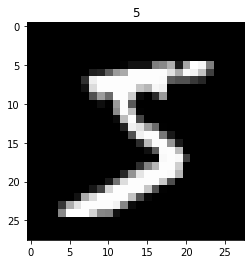

/home/rashed/.virtualenvs/dl/lib/python3.9/site-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/home/rashed/.virtualenvs/dl/lib/python3.9/site-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


/home/rashed/.virtualenvs/dl/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch:  0 | train loss: 2.3037 | test accuracy: 0.10


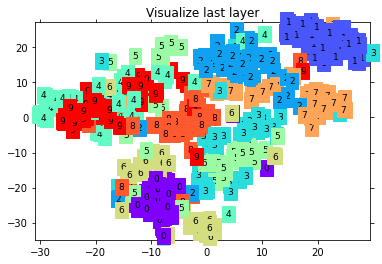

Epoch:  0 | train loss: 0.4987 | test accuracy: 0.83


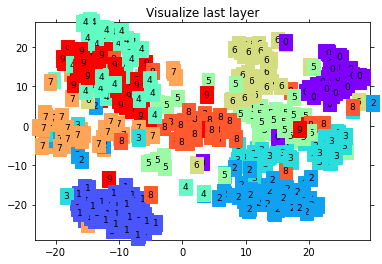

Epoch:  0 | train loss: 0.1854 | test accuracy: 0.90


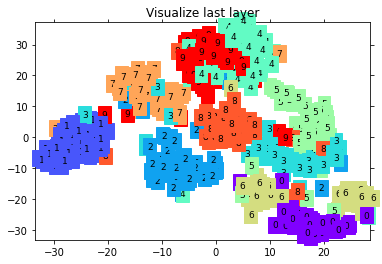

Epoch:  0 | train loss: 0.1472 | test accuracy: 0.92


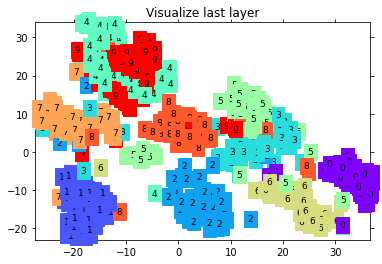

Epoch:  0 | train loss: 0.0578 | test accuracy: 0.93


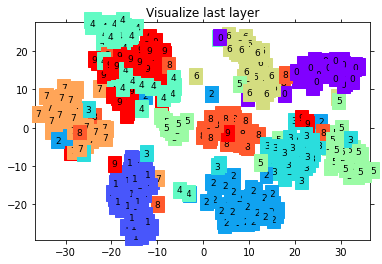

Epoch:  0 | train loss: 0.3658 | test accuracy: 0.94


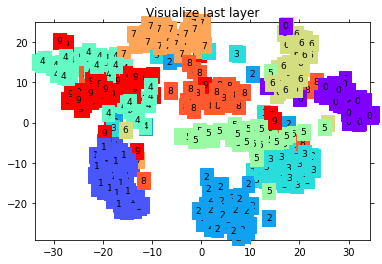

Epoch:  0 | train loss: 0.0433 | test accuracy: 0.95


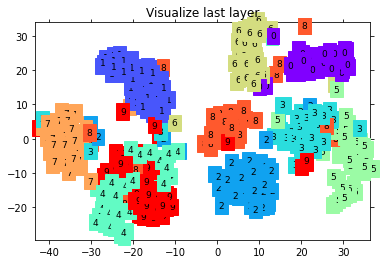

Epoch:  0 | train loss: 0.0373 | test accuracy: 0.96


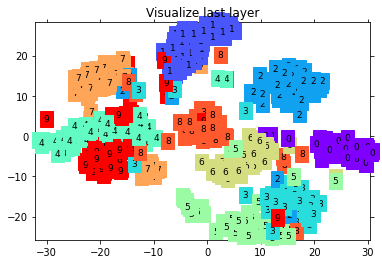

Epoch:  0 | train loss: 0.1136 | test accuracy: 0.96


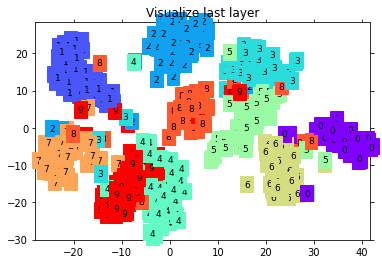

Epoch:  0 | train loss: 0.1250 | test accuracy: 0.96


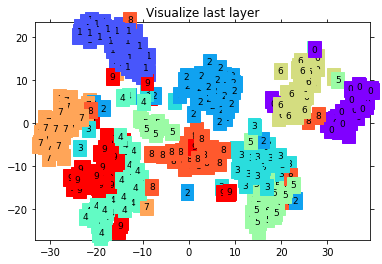

Epoch:  0 | train loss: 0.0313 | test accuracy: 0.97


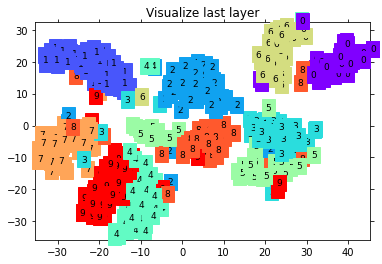

Epoch:  0 | train loss: 0.0399 | test accuracy: 0.96


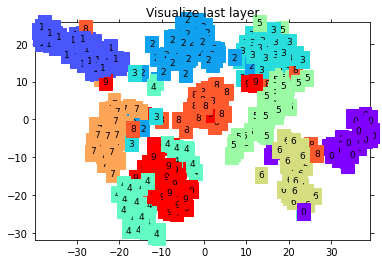

Epoch:  0 | train loss: 0.1378 | test accuracy: 0.97


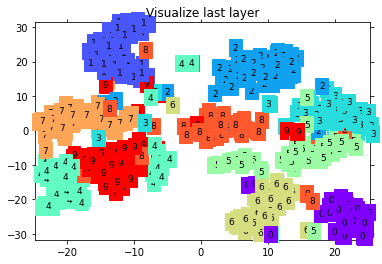

Epoch:  0 | train loss: 0.1594 | test accuracy: 0.97


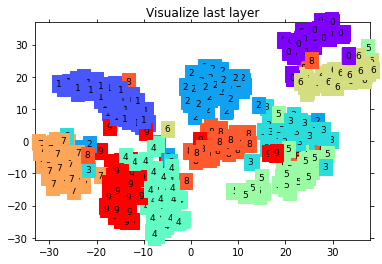

Epoch:  0 | train loss: 0.1738 | test accuracy: 0.97


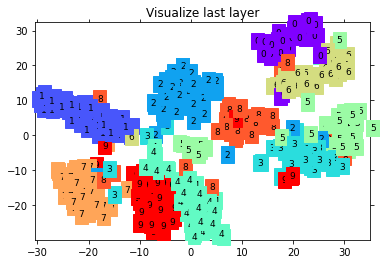

Epoch:  0 | train loss: 0.0831 | test accuracy: 0.97


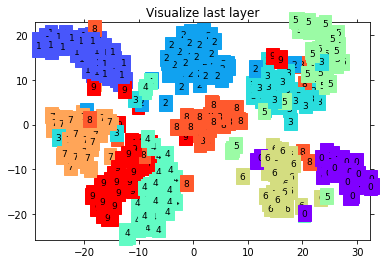

Epoch:  0 | train loss: 0.0191 | test accuracy: 0.97


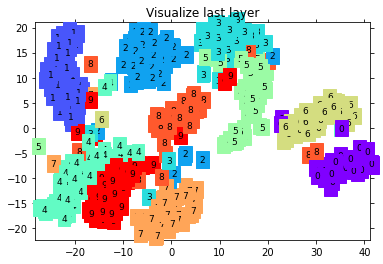

Epoch:  0 | train loss: 0.0250 | test accuracy: 0.97


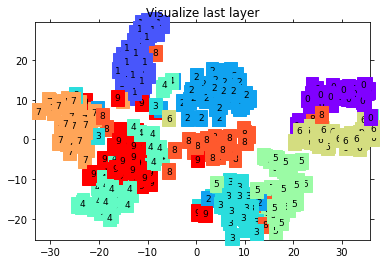

Epoch:  0 | train loss: 0.0194 | test accuracy: 0.98


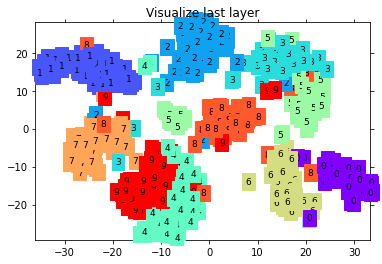

Epoch:  0 | train loss: 0.0811 | test accuracy: 0.97


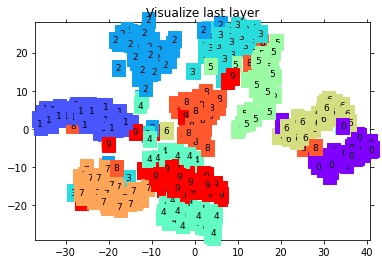

Epoch:  0 | train loss: 0.1075 | test accuracy: 0.97


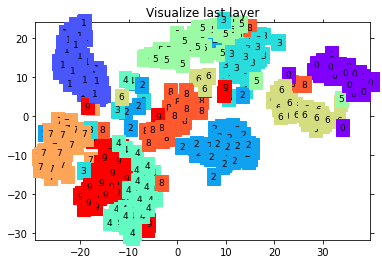

Epoch:  0 | train loss: 0.0314 | test accuracy: 0.98


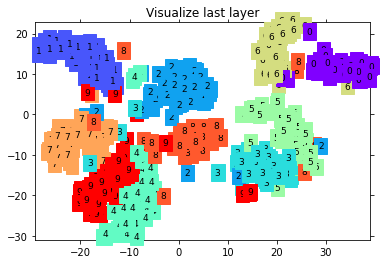

Epoch:  0 | train loss: 0.0468 | test accuracy: 0.97


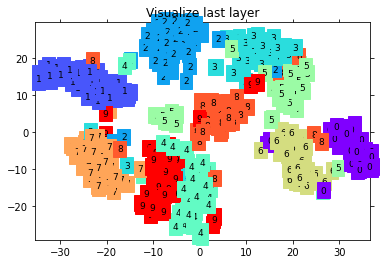

Epoch:  0 | train loss: 0.0100 | test accuracy: 0.97


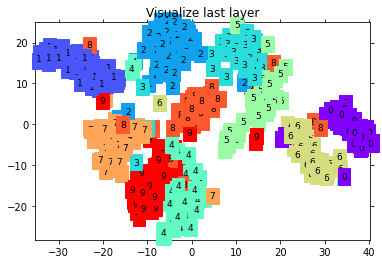

[7 2 1 0 4 1 4 9 5 9] prediction number
[7 2 1 0 4 1 4 9 5 9] real number


In [5]:

"""
View more, visit my tutorial page: https://mofanpy.com/tutorials/
My Youtube Channel: https://www.youtube.com/user/MorvanZhou
Dependencies:
torch: 0.4
torchvision
matplotlib
"""
# library
# standard library
import os

# third-party library
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
import torchvision.datasets as datasets
import torchvision.transforms as transforms

# torch.manual_seed(1)    # reproducible

# Hyper Parameters
EPOCH = 1               # train the training data n times, to save time, we just train 1 epoch
BATCH_SIZE = 50
LR = 0.001              # learning rate
DOWNLOAD_MNIST = False


# Mnist digits dataset

train_data = datasets.MNIST(root='dataset/', train=True, transform=transforms.ToTensor(), download=True)

# plot one example
print(train_data.train_data.size())                 # (60000, 28, 28)
print(train_data.train_labels.size())               # (60000)
plt.imshow(train_data.train_data[0].numpy(), cmap='gray')
plt.title('%i' % train_data.train_labels[0])
plt.show()

# Data Loader for easy mini-batch return in training, the image batch shape will be (50, 1, 28, 28)
train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

# pick 2000 samples to speed up testing
test_data = datasets.MNIST(root='dataset/', train=False, transform=transforms.ToTensor(), download=True)
test_x = torch.unsqueeze(test_data.test_data, dim=1).type(torch.FloatTensor)[:2000]/255.   # shape from (2000, 28, 28) to (2000, 1, 28, 28), value in range(0,1)
test_y = test_data.test_labels[:2000]


class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(         # input shape (1, 28, 28)
            nn.Conv2d(
                in_channels=1,              # input height
                out_channels=16,            # n_filters
                kernel_size=5,              # filter size
                stride=1,                   # filter movement/step
                padding=2,                  # if want same width and length of this image after Conv2d, padding=(kernel_size-1)/2 if stride=1
            ),                              # output shape (16, 28, 28)
            nn.ReLU(),                      # activation
            nn.MaxPool2d(kernel_size=2),    # choose max value in 2x2 area, output shape (16, 14, 14)
        )
        self.conv2 = nn.Sequential(         # input shape (16, 14, 14)
            nn.Conv2d(16, 32, 5, 1, 2),     # output shape (32, 14, 14)
            nn.ReLU(),                      # activation
            nn.MaxPool2d(2),                # output shape (32, 7, 7)
        )
        self.out = nn.Linear(32 * 7 * 7, 10)   # fully connected layer, output 10 classes

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)           # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        output = self.out(x)
        return output, x    # return x for visualization


cnn = CNN()
print(cnn)  # net architecture

optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)   # optimize all cnn parameters
loss_func = nn.CrossEntropyLoss()                       # the target label is not one-hotted

# following function (plot_with_labels) is for visualization, can be ignored if not interested
from matplotlib import cm
try: from sklearn.manifold import TSNE; HAS_SK = True
except: HAS_SK = False; print('Please install sklearn for layer visualization')
def plot_with_labels(lowDWeights, labels):
    plt.cla()
    X, Y = lowDWeights[:, 0], lowDWeights[:, 1]
    for x, y, s in zip(X, Y, labels):
        c = cm.rainbow(int(255 * s / 9)); plt.text(x, y, s, backgroundcolor=c, fontsize=9)
    plt.xlim(X.min(), X.max()); plt.ylim(Y.min(), Y.max()); plt.title('Visualize last layer'); plt.show(); plt.pause(0.01)

plt.ion()
# training and testing
for epoch in range(EPOCH):
    for step, (b_x, b_y) in enumerate(train_loader):   # gives batch data, normalize x when iterate train_loader

        output = cnn(b_x)[0]               # cnn output
        loss = loss_func(output, b_y)   # cross entropy loss
        optimizer.zero_grad()           # clear gradients for this training step
        loss.backward()                 # backpropagation, compute gradients
        optimizer.step()                # apply gradients

        if step % 50 == 0:
            test_output, last_layer = cnn(test_x)
            pred_y = torch.max(test_output, 1)[1].data.numpy()
            accuracy = float((pred_y == test_y.data.numpy()).astype(int).sum()) / float(test_y.size(0))
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.numpy(), '| test accuracy: %.2f' % accuracy)
            if HAS_SK:
                # Visualization of trained flatten layer (T-SNE)
                tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
                plot_only = 500
                low_dim_embs = tsne.fit_transform(last_layer.data.numpy()[:plot_only, :])
                labels = test_y.numpy()[:plot_only]
                plot_with_labels(low_dim_embs, labels)
plt.ioff()

# print 10 predictions from test data
test_output, _ = cnn(test_x[:10])
pred_y = torch.max(test_output, 1)[1].data.numpy()
print(pred_y, 'prediction number')
print(test_y[:10].numpy(), 'real number')
